In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("swiggy.csv")
print("Loaded data")

Loaded data


In [18]:
print("Original Shape:", df.shape)
print("Column Names:", df.columns)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

Original Shape: (148541, 11)
Column Names: Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')
Missing Values:
 id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64
Duplicates: 0


In [19]:
df.dropna(inplace=True)  # Do not assign it back to df
df.to_csv("cleaned_data3.csv", index=False)
print("Cleaned data saved as cleaned_data3.csv")

Cleaned data saved as cleaned_data3.csv


In [20]:
df2 = pd.read_csv("cleaned_data3.csv")
df2

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148250,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148251,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148252,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148253,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [21]:
# Make a copy of the original column to avoid overwriting
split_columns = df2['city'].str.split(',', expand=True)

In [ ]:
# Rename safely
df2['city'] = split_columns[0]
df2['main_city'] = split_columns[1]

In [23]:
df2.to_csv("cleaned_data2_with_main_city.csv", index=False)

In [36]:
df3 = pd.read_csv("cleaned_data2_with_main_city.csv")
df3

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu,main_city
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,NaN
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,NaN
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,NaN
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,NaN
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148250,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json,NaN
148251,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json,NaN
148252,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json,NaN
148253,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json,NaN


In [37]:
df3.replace('--', pd.NA, inplace=True)

In [39]:
df3.dropna(inplace=True)

In [ ]:
# df3.reset_index(drop=True, inplace=True)

In [40]:
df3.to_csv("cleaned_data3_with_main_city.csv")

In [2]:
df4 = pd.read_csv("cleaned_data3_with_main_city.csv")
print(df4)

           id                                               name  \
0       40184                                  M.A.D By Tomato'S   
1       45635                                           Tea Post   
2      332746                                      Thali Central   
3       55560                                       Shreejikrupa   
4      377536                                  The Baker's Dozen   
...       ...                                                ...   
39383  448869                             satti babu biryani inn   
39384   63729                          Tulips - Hotel Green Park   
39385  554832                                 Chandu Sweets 1963   
39386  365893  Frozen Bottle - Milkshakes, Desserts And Ice C...   
39387  456123                                  AASWAD - TAKEAWAY   

               city  rating  rating_count    cost               cuisine  \
0         Vastrapur     4.3  100+ ratings  ₹ 1200        Indian,Chinese   
1         Vastrapur     4.0  100+

In [3]:
df4['cost'] = df4['cost'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

In [4]:
df4['rating_count'] = df4['rating_count'].str.extract(r'(\d+)').astype(float)

In [6]:
df4.to_csv("cld_data_final.csv")

In [48]:
label_encoder = LabelEncoder()
df4['name_encoded'] = label_encoder.fit_transform(df4['name'])

In [49]:
categorical_cols = ['city', 'cuisine']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = encoder.fit_transform(df4[categorical_cols])

In [50]:
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

In [51]:
numerical_cols = ['rating', 'rating_count', 'cost']
final_encoded = pd.concat(
    [df4[['name_encoded']].reset_index(drop=True), 
     encoded_df.reset_index(drop=True), 
     df4[numerical_cols].reset_index(drop=True)], 
    axis=1
)

In [52]:
with open("encoder1.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [53]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [54]:
final_encoded.to_csv("encoded_data.csv", index=False)

In [11]:
encoded_df = pd.read_csv("encoded_data.csv")
display(encoded_df)

,name_encoded,city_Abids & Koti,city_Adajan,city_Adyar,city_Airoli,city_Akota,city_Aliganj,city_Alipore,city_Aluva,city_Alwal,...,"cuisine_Vietnamese,Asian","cuisine_Vietnamese,Chinese","cuisine_Vietnamese,Korean",cuisine_Waffle,"cuisine_Waffle,Bakery","cuisine_Waffle,Beverages","cuisine_Waffle,Desserts",rating,rating_count,cost
0,12358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,100+ ratings,₹ 1200
1,21471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,100+ ratings,₹ 150
2,21564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,100+ ratings,₹ 250
3,19598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,50+ ratings,₹ 200
4,21678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,100+ ratings,₹ 300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39383,24609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.1,20+ ratings,₹ 250
39384,23023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,20+ ratings,₹ 350
39385,4576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,20+ ratings,₹ 250
39386,7470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,100+ ratings,₹ 250


In [9]:
n_clusters = 10

In [13]:
encoded_df['rating_count'] = encoded_df['rating_count'].str.extract(r'(\d+)').astype(float)

In [14]:
encoded_df['cost'] = encoded_df['cost'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

In [61]:
print(encoded_df[['rating','rating_count', 'cost']].head())

   rating  rating_count    cost
0     4.3         100.0  1200.0
1     4.0         100.0   150.0
2     3.6         100.0   250.0
3     4.0          50.0   200.0
4     4.3         100.0   300.0


In [15]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
encoded_df['cluster'] = kmeans.fit_predict(encoded_df)

In [63]:
with open("kmeans_model_new.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [64]:
encoded_df.to_csv("clustered_data_new.csv", index=False)
print("KMeans clustering completed and saved as clustered_data.csv")

KMeans clustering completed and saved as clustered_data.csv


In [65]:
user_input_vector = encoded_df.drop(columns=['cluster']).iloc[0].values.reshape(1, -1)

In [66]:
user_cluster = kmeans.predict(user_input_vector)[0]

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [67]:
recommendations = encoded_df[encoded_df['cluster'] == user_cluster].sample(6)

print("Recommended Restaurants from Cluster:", user_cluster)
print(recommendations)

Recommended Restaurants from Cluster: 5
       name_encoded  city_Abids & Koti  city_Adajan  city_Adyar  city_Airoli  \
9554          13090                0.0          0.0         0.0          0.0   
8891          14323                0.0          0.0         0.0          0.0   
2189          14462                0.0          0.0         0.0          0.0   
34179         14067                0.0          0.0         0.0          0.0   
32211         13493                0.0          0.0         0.0          0.0   
942           13510                0.0          0.0         0.0          0.0   

       city_Akota  city_Aliganj  city_Alipore  city_Aluva  city_Alwal  ...  \
9554          0.0           0.0           0.0         0.0         0.0  ...   
8891          0.0           0.0           0.0         0.0         0.0  ...   
2189          0.0           0.0           0.0         0.0         0.0  ...   
34179         0.0           0.0           0.0         0.0         0.0  ...   
32211    

In [68]:
new_en_data = pd.read_csv("encoded_data.csv")
new_cls_data = pd.read_csv("clustered_data_new.csv")

In [69]:
new_en_data['rating_count'] = new_en_data['rating_count'].astype(str).str.extract(r'(\d+)').astype(float)
new_en_data['cost'] = new_en_data['cost'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

In [70]:
new_en_data.dropna(inplace=True)

In [71]:
features = new_en_data.drop(columns=['cluster'], errors='ignore')  # If cluster already exists
kmeans = KMeans(n_clusters=5, random_state=42)
new_en_data['cluster'] = kmeans.fit_predict(features)

In [72]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

In [73]:
new_en_data['PC1'] = reduced[:, 0]
new_en_data['PC2'] = reduced[:, 1]

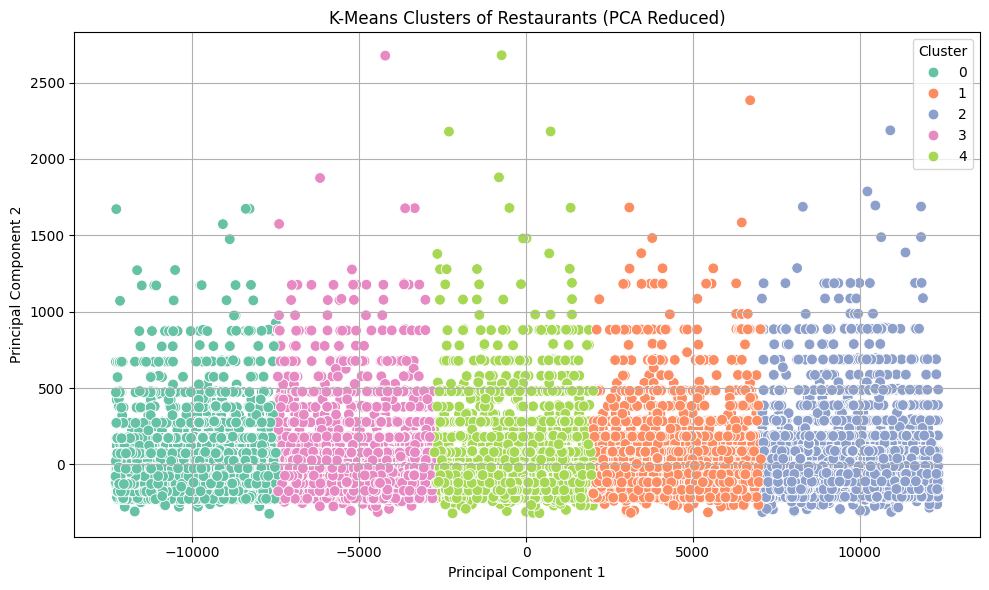

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_en_data, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title("K-Means Clusters of Restaurants (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()